Import packages

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

Load dataset and examine first 5 rows

In [14]:
load = pd.read_excel('data/load.xlsx')
load.head()

,meter_id,date,h1,h2,h3,h4,h5,h6,h7,h8,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,1,2005-01-01,3304,3178.0,2981,2944,2934,2999,3104,3296,...,2270,2233,2330,2855,3020,3097,2994,2965,2776,2590
1,1,2005-01-02,2485,2448.0,2487,2553,2619,2900,3133,3399,...,2220,2193,2403,3012,3291,3236,3131,3002,2805,2569
2,1,2005-01-03,2417,2435.0,2448,2537,2674,2900,3385,3472,...,1915,1976,2257,2929,3256,3210,3078,2881,2543,2280
3,1,2005-01-04,2060,2018.0,2010,2094,2115,2327,2714,2758,...,1695,1760,1931,2514,2805,2782,2608,2496,2149,1829
4,1,2005-01-05,1629,1546.0,1569,1566,1650,1826,2288,2411,...,1668,1779,1923,2524,2821,2829,2632,2440,2133,1921


Create aggregated (by day) dataframe

In [74]:
# Perform aggregations
row_avg = load.iloc[:, 2:].apply(np.nanmean, axis = 1)
row_min = load.iloc[:, 2:].apply(np.min, axis = 1)
row_max = load.iloc[:, 2:].apply(np.max, axis = 1)

# Make new dataframe
load_agg = pd.DataFrame({'Date': load.date, 'Avg_load': row_avg, 'Peak_hrly_load': row_max, \
                        'Min_hrly_load': row_min})
load_agg.head()

,Date,Avg_load,Peak_hrly_load,Min_hrly_load
0,2005-01-01,2889.125000,3467.0,2233.0
1,2005-01-02,2788.958333,3574.0,2193.0
2,2005-01-03,2708.458333,3472.0,1915.0
3,2005-01-04,2211.583333,2805.0,1695.0
4,2005-01-05,2035.125000,2829.0,1546.0


Add features based on date that may be helpful for forecasting

In [76]:
# Add month and year
load_agg['Month'] = pd.DatetimeIndex(load_agg['Date']).month
load_agg['Year'] = pd.DatetimeIndex(load_agg['Date']).year

# Add day of the week
load_agg['DOW'] = pd.DatetimeIndex(load_agg['Date']).dayofweek

# Check for federal holidays
dr = pd.date_range(start = '2000-01-01', end = '2021-12-31')
cal = calendar()
holidays = cal.holidays(start = dr.min(), end = dr.max())
load_agg['Holiday'] = load_agg['Date'].isin(holidays).astype(int)

# Examine results
load_agg.head()

,Date,Avg_load,Peak_hrly_load,Min_hrly_load,Month,Year,DOW,Holiday
0,2005-01-01,2889.125000,3467.0,2233.0,1,2005,5,0
1,2005-01-02,2788.958333,3574.0,2193.0,1,2005,6,0
2,2005-01-03,2708.458333,3472.0,1915.0,1,2005,0,0
3,2005-01-04,2211.583333,2805.0,1695.0,1,2005,1,0
4,2005-01-05,2035.125000,2829.0,1546.0,1,2005,2,0


Make quick plots of time series, ACF, PACF

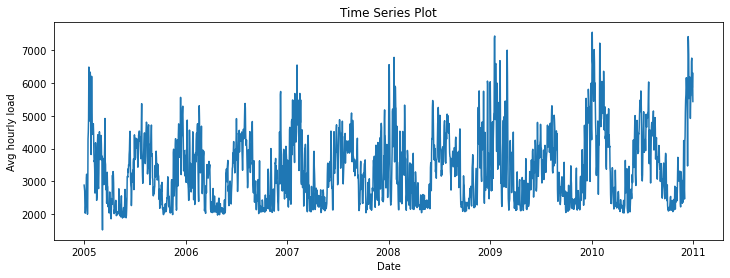

In [77]:
plt.figure(figsize=(12, 4))
plt.plot(load_agg.Date, load_agg.Avg_load);
plt.xlabel('Date');
plt.ylabel('Avg hourly load');
plt.title('Time Series Plot');

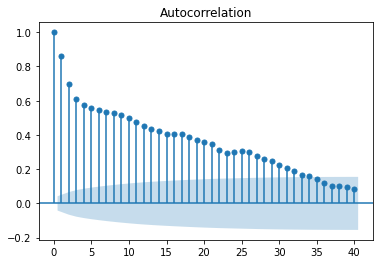

In [78]:
plot_acf(load_agg.Avg_load, lags = 40);

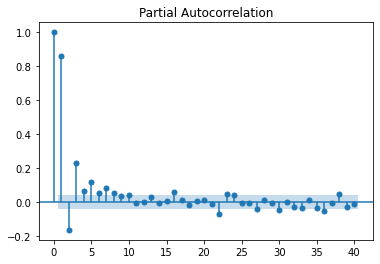

In [79]:
plot_pacf(load_agg.Avg_load, lags = 40);

Let's try ARIMA without exogenous variables

In [61]:
# Create time series
ts_df = load_agg.iloc[:, :2]
ts_df.set_index('Date', inplace = True)

Split train and test

Calc some performance metric

Fit on full data?

Make test series

Predict

https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd